In [1]:
import xarray as xr
import pandas as pd

%matplotlib inline
import fiona
import rasterio
import rasterio.mask


import datetime as dt

import numpy as np




### Masking shapefile

In [2]:
import fiona
import rasterio
import rasterio.mask

# create geometry coordinates of shapefile boundary 
# open the MDB shapefile 
with fiona.open("/g/data/oe9/project/team-drip/MDB_shapefile/land_cover/merged_land_cover.shp", "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]
geoms

[{'coordinates': [[[(146.10647899970616, -37.6406830004201),
     (146.1017809997934, -37.6406830004201),
     (146.1017809997934, -37.63833400001403),
     (146.10647899970616, -37.63833400001403),
     (146.10647899970616, -37.6406830004201)]],
   [[(146.113526000025, -37.59605199989983),
     (146.11117699961892, -37.59605199989983),
     (146.11117699961892, -37.593703000393134),
     (146.113526000025, -37.593703000393134),
     (146.113526000025, -37.59605199989983)]],
   [[(146.11822399993775, -37.59605199989983),
     (146.11587500043095, -37.59605199989983),
     (146.11587500043095, -37.593703000393134),
     (146.11822399993775, -37.593703000393134),
     (146.11822399993775, -37.59605199989983)]],
   [[(143.97593600014636, -37.49739399993308),
     (143.9735869997403, -37.49739399993308),
     (143.9735869997403, -37.49504500042639),
     (143.97593600014636, -37.49504500042639),
     (143.97593600014636, -37.49739399993308)]],
   [[(143.96808497174413, -37.49453000905265),

In [9]:
geoms[0]

{'coordinates': [[[(146.10647899970616, -37.6406830004201),
    (146.1017809997934, -37.6406830004201),
    (146.1017809997934, -37.63833400001403),
    (146.10647899970616, -37.63833400001403),
    (146.10647899970616, -37.6406830004201)]],
  [[(146.113526000025, -37.59605199989983),
    (146.11117699961892, -37.59605199989983),
    (146.11117699961892, -37.593703000393134),
    (146.113526000025, -37.593703000393134),
    (146.113526000025, -37.59605199989983)]],
  [[(146.11822399993775, -37.59605199989983),
    (146.11587500043095, -37.59605199989983),
    (146.11587500043095, -37.593703000393134),
    (146.11822399993775, -37.593703000393134),
    (146.11822399993775, -37.59605199989983)]],
  [[(143.97593600014636, -37.49739399993308),
    (143.9735869997403, -37.49739399993308),
    (143.9735869997403, -37.49504500042639),
    (143.97593600014636, -37.49504500042639),
    (143.97593600014636, -37.49739399993308)]],
  [[(143.96808497174413, -37.49453000905265),
    (143.96888899982

In [3]:
# mask the SPI raster based on geoms 
with rasterio.open("/g/data/oe9/project/team-drip/Rainfall/pearson_r_evi.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, geoms,
                                                        crop=True)
    out_meta = src.meta.copy()

In [5]:
out_meta

{'count': 1,
 'crs': None,
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 263,
 'nodata': 1.0,
 'transform': Affine(0.05000000000000071, 0.0, 138.475,
       0.0, -0.05000000000000071, -24.52499999999981),
 'width': 280}

In [6]:
out_transform # Affine transform variable used for rasterise the geoms 

Affine(0.05000000000000071, 0.0, 138.52500000000001,
       0.0, -0.05000000000000071, -24.574999999999811)

In [7]:
corr_change_evi = xr.open_dataset('/g/data/oe9/project/team-drip/Spatial_temporal_correlation/SPI_VI_before_after/corr_diff_12M_EVI.nc')

In [8]:
corr_change_evi


<xarray.Dataset>
Dimensions:     (latitude: 263, longitude: 280)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
Data variables:
    pearson_r   (latitude, longitude) float64 ...
    pearson_p   (latitude, longitude) float64 ...
    spearman_r  (latitude, longitude) float64 ...
    spearman_p  (latitude, longitude) float64 ...

In [9]:
shape_data = corr_change_evi.pearson_r.shape
shape_data # shape of the raster (no. of col and no. of rows)

(263, 280)

In [10]:
# create masking array 
import rasterio
from rasterio import features
mask = xr.DataArray(
    features.rasterize(geoms, out_shape=shape_data, transform=out_transform, all_touched= False),
    coords=corr_change_evi.coords,
)
mask

<xarray.DataArray (latitude: 263, longitude: 280)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
Coordinates:
  * latitude   (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude  (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 138.8 ...

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


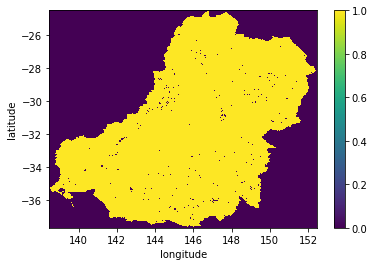

In [11]:
mask.plot.imshow()

In [14]:
subset_RAIN = AWAP_RAIN.where(mask, drop=True)
subset_RAIN

<xarray.Dataset>
Dimensions:     (latitude: 261, longitude: 278, nv: 2, time: 696)
Coordinates:
  * latitude    (latitude) float64 -24.6 -24.65 -24.7 -24.75 -24.8 -24.85 ...
  * longitude   (longitude) float64 138.6 138.6 138.7 138.7 138.8 138.8 ...
  * time        (time) datetime64[ns] 1960-01-01 1960-02-01 1960-03-01 ...
Dimensions without coordinates: nv
Data variables:
    crs         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    lat_bounds  (time, latitude, nv, longitude) float64 nan nan nan nan nan ...
    lon_bounds  (time, longitude, nv, latitude) float64 nan nan nan nan nan ...
    rain_month  (time, latitude, longitude) float64 nan nan nan nan nan nan ...

In [16]:
path = '/g/data/oe9/project/team-drip/AWAP/AWAP_month_rain_masked.nc'
subset_RAIN.to_netcdf(path, mode = 'w')

In [15]:
# save the mask array into a nc file 
path = '/g/data/oe9/project/team-drip/MDB_MASK/MASK_ARRAY_AWAP.nc'
mask.to_netcdf(path, mode = 'w')

In [45]:
mask

<xarray.DataArray (y: 3147, x: 3346)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
Coordinates:
    band     int64 2
  * y        (y) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * x        (x) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
    time     datetime64[ns] 2000-02-18